<a href="https://colab.research.google.com/github/anujdutt9/PyTorch-DeepLearning/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from torch.nn import Linear
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(101)

**Basic Linear Regression Equation**

In [0]:
# Weight
W = torch.tensor(3.0, requires_grad=True)

# Bias
b = torch.tensor(1.0, requires_grad=True)

In [0]:
# Forward Pass
def forward(X):
  # Linear Regression
  y = W * X + b
  return y

In [5]:
x = torch.tensor(2)

# Make Prediction
print(forward(X=x))

tensor(7., grad_fn=<AddBackward0>)


In [6]:
x = torch.tensor([[4], [7]])

# Make Prediction
print(forward(X=x))

tensor([[13],
        [22]], grad_fn=<AddBackward0>)


**Creating a Linear Model**

In [0]:
# Linear Model with 1 input and 1 output
model = Linear(in_features=1, out_features=1)

In [8]:
model.bias

Parameter containing:
tensor([-0.0994], requires_grad=True)

In [9]:
model.weight

Parameter containing:
tensor([[-0.6039]], requires_grad=True)

In [10]:
x = torch.tensor([2.0])

# Make a Prediction
print(model(x))

tensor([-1.3072], grad_fn=<AddBackward0>)


In [11]:
x = torch.tensor([[3.0], [5.0]])

# Make a Prediction
print(model(x))

tensor([[-1.9111],
        [-3.1189]], grad_fn=<AddmmBackward>)


**Create a Dummy Dataset**

In [0]:
# Create a Dummy Datatset
x = torch.randn(100, 1)*10
x

In [0]:
y = x + 3*torch.randn(100, 1)

Text(0, 0.5, 'y')

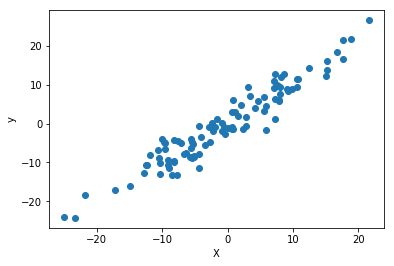

In [14]:
plt.plot(x.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')

**Custom Modules**

In [0]:
# Linear Regression Model Class
class LinearRegression(nn.Module):
  
  # Constructor
  def __init__(self, input_size, output_size):
    super().__init__()
    
    # Linear Model
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)
    
  # Forward Pass
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
# Model Initialization
lr_model = LinearRegression(input_size=1, output_size=1)

In [17]:
lr_model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [0]:
# Get Model Parameters
def get_params():
  [w,b] = lr_model.parameters()
  w = w[0][0].item()
  b = b[0].item()
  return (w,b)

In [0]:
# Plotting Function
def plot_fit(title):
  plt.title(title)
  W, b = get_params()
  x_in = np.array([-30, 30])
  y_pred = W * x_in + b
  plt.plot(x_in, y_pred, 'r')
  plt.scatter(x, y)

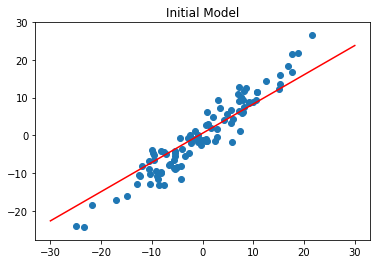

In [20]:
plot_fit(title='Initial Model')

In [0]:
# Loss Criterion
criterion = nn.MSELoss()

In [0]:
# Optimizer
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

In [0]:
# Epochs
epochs = 100

In [24]:
losses = []

for e in range(epochs):
  y_pred = lr_model.forward(x)
  
  loss = criterion(y, y_pred)
  
  losses.append(loss)
  
  optimizer.zero_grad()
  
  loss.backward()
  
  optimizer.step()
  
  if (e%10 == 0):
    print('epoch: {}'.format(e),
       'loss: {}'.format(loss.item()))

epoch: 0 loss: 13.375500679016113
epoch: 10 loss: 8.300289154052734
epoch: 20 loss: 8.240790367126465
epoch: 30 loss: 8.223700523376465
epoch: 40 loss: 8.212434768676758
epoch: 50 loss: 8.204909324645996
epoch: 60 loss: 8.199878692626953
epoch: 70 loss: 8.196520805358887
epoch: 80 loss: 8.194273948669434
epoch: 90 loss: 8.192773818969727


Text(0, 0.5, 'loss')

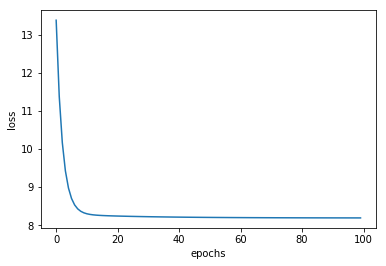

In [25]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

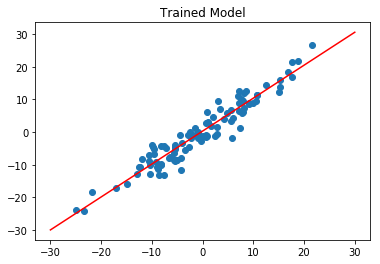

In [26]:
plot_fit(title='Trained Model')